False


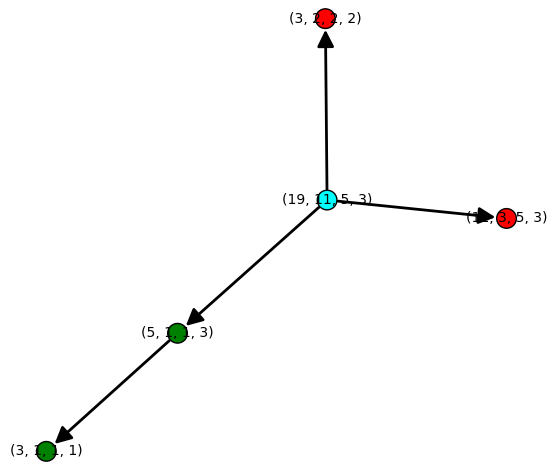

In [48]:
from singularite import eclatements, pairwise_coprime, isJStrict


def ok(n, xs):
    if all(x <= 1 for x in xs):
        return True
    return pairwise_coprime((n, *xs))


def T(n, xs):
    children, bad = [], set()
    if ok(n, xs):
        for (ni, xi) in eclatements(n, xs):
            subt, subs = T(ni, xi)
            children.append(subt)
            bad |= subs
    else:
        bad |= {(n, *xs)}
    return (LabelledOrderedTree(children, label=(n, *xs)), bad)


n, r =  12, (11, 5, 3)
print(isJStrict(n, r))
t, b = T(n, r)
if len(b) == 0:
    view(t)
else:
    show(t.as_digraph().plot(vertex_color='green', vertex_colors={'red': b, 'cyan': {(n, *r)}}))